In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/refs/heads/main/data/fraud_small_imbalanced.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130147 entries, 0 to 130146
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   cc_num    130147 non-null  float64
 1   amt       130147 non-null  float64
 2   gender    130147 non-null  object 
 3   category  130147 non-null  object 
 4   is_fraud  130146 non-null  float64
dtypes: float64(3), object(2)
memory usage: 5.0+ MB


In [2]:

## value counts of y
## 0.4% fraudulent transactions
df['is_fraud'].value_counts() / len(df)

,count
is_fraud,
0.0,0.995951
1.0,0.004042


In [3]:
## drop cc_num
## drop cc_num
df.drop('cc_num', axis=1, inplace=True)

In [4]:
## REMOVE MISSING VALUES
df.dropna(inplace=True)

In [5]:
## encode (dummy)
df = pd.get_dummies(df, drop_first=True)

In [6]:

## X and y
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

In [7]:

## split into 80% and 20% random_state = 591
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=591)

## Modeling

In [8]:

## LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

## instance
lr = LogisticRegression()

## fit
lr.fit(X_train, y_train)

LogisticRegression()

In [9]:
## predictions
y_pred = lr.predict(X_test)

In [16]:
## propensities
p_hat = lr.predict_proba(X_test)[:,1]

In [15]:
## decision function
theta_hat = lr.decision_function(X_test)  ## distance

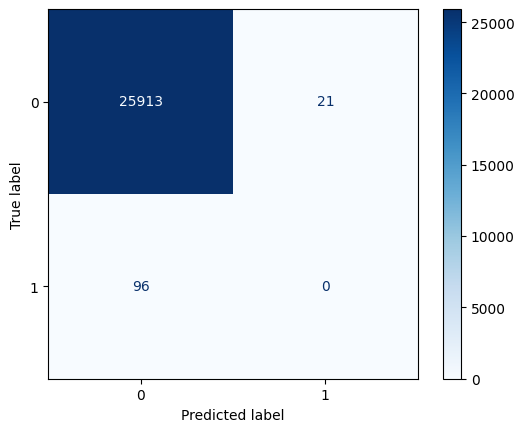

In [17]:
## confusion matrix, metrics - you need y_pred
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap = "Blues")

In [21]:
## metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score
from imblearn.metrics import specificity_score

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Specificity: {specificity_score(y_test, y_pred)}')

print(f'===================================================')
print(f'True Positive Rate: {recall_score(y_test, y_pred)}')
print(f'False Positive Rate: {1 - specificity_score(y_test, y_pred)}')
print("True Positive Rate: HIGH")
print("False Positive Rate: LOW")

Accuracy: 0.995505186323473
Recall: 0.0
Precision: 0.0
Specificity: 0.9991902521786072
True Positive Rate: 0.0
False Positive Rate: 0.0008097478213927589
True Positive Rate: HIGH
False Positive Rate: LOW


In [24]:
## show the table of propensities
df_test = X_test.copy()
df_test['y_true'] = y_test
df_test['p_hat'] = p_hat
df_test.sort_values('p_hat', ascending=False, inplace=True)
df_test.head(50)

,amt,gender_M,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,y_true,p_hat
77413,12882.78,True,False,False,False,False,False,False,False,False,False,False,False,False,True,0.0,1.000000
87794,12882.33,True,False,False,False,False,False,False,False,False,False,False,False,False,True,0.0,1.000000
81264,8508.34,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0.0,0.999985
120060,5899.86,False,False,False,False,False,False,False,False,False,False,False,True,False,False,0.0,0.999551
35983,6297.01,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0.0,0.998216
74589,4806.47,True,False,False,False,False,False,False,False,False,False,False,False,True,False,0.0,0.988562
80242,5186.92,True,False,False,False,False,False,False,False,False,False,False,False,False,True,0.0,0.980842
73804,4537.48,True,False,False,False,False,False,False,False,False,False,False,False,True,False,0.0,0.979802
15458,3936.15,True,False,False,False,False,False,False,False,False,False,False,False,True,False,0.0,0.930250
8851,3344.72,True,False,False,False,False,False,False,False,False,False,False,True,False,False,0.0,0.901422


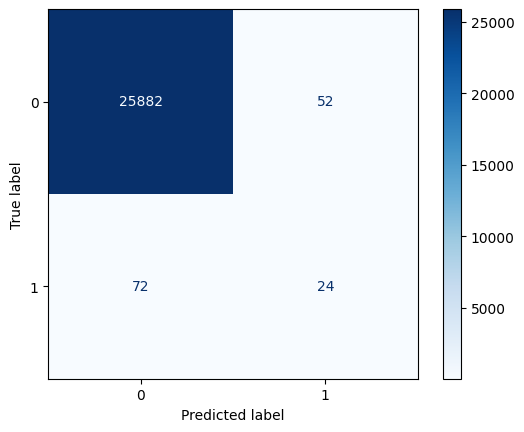

In [25]:
## SET A NEW THRESHOLD AT 0.05
y_pred =(p_hat > 0.05).astype(int)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap = "Blues")

In [26]:
## metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score
from imblearn.metrics import specificity_score

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Specificity: {specificity_score(y_test, y_pred)}')

print(f'===================================================')
print(f'True Positive Rate: {recall_score(y_test, y_pred)}')
print(f'False Positive Rate: {1 - specificity_score(y_test, y_pred)}')
print("True Positive Rate: HIGH")
print("False Positive Rate: LOW")

Accuracy: 0.9952362658470995
Recall: 0.25
Precision: 0.3157894736842105
Specificity: 0.9979949101565513
True Positive Rate: 0.25
False Positive Rate: 0.002005089843448715
True Positive Rate: HIGH
False Positive Rate: LOW


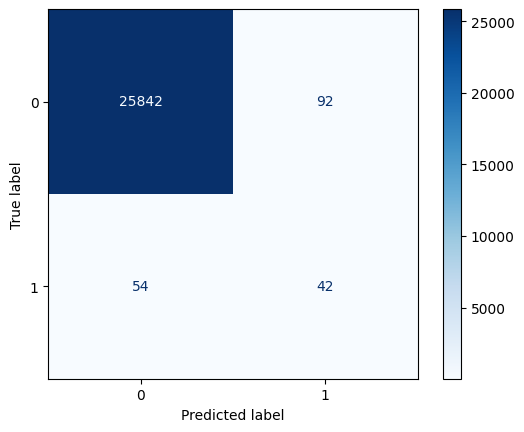

In [28]:
## TRY THRESHOLD AT 0.03
y_pred =(p_hat > 0.03).astype(int)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap = "Blues")

In [29]:
## metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score
from imblearn.metrics import specificity_score

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Specificity: {specificity_score(y_test, y_pred)}')

print(f'===================================================')
print(f'True Positive Rate: {recall_score(y_test, y_pred)}')
print(f'False Positive Rate: {1 - specificity_score(y_test, y_pred)}')
print("True Positive Rate: HIGH")
print("False Positive Rate: LOW")

Accuracy: 0.9943910872070688
Recall: 0.4375
Precision: 0.31343283582089554
Specificity: 0.9964525333538984
True Positive Rate: 0.4375
False Positive Rate: 0.0035474666461016158
True Positive Rate: HIGH
False Positive Rate: LOW


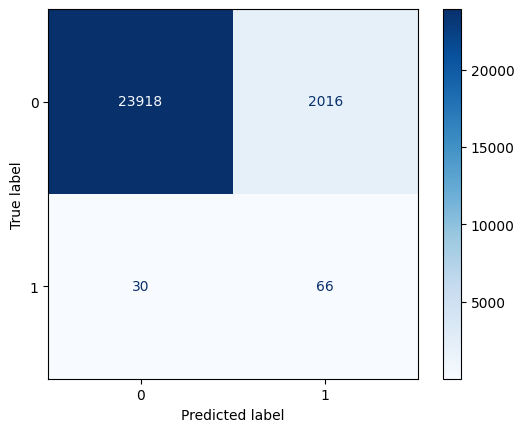

In [30]:
## Try threshold of 0.01
y_pred =(p_hat > 0.01).astype(int)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap = "Blues")

In [31]:
## metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score
from imblearn.metrics import specificity_score

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Specificity: {specificity_score(y_test, y_pred)}')

print(f'===================================================')
print(f'True Positive Rate: {recall_score(y_test, y_pred)}')
print(f'False Positive Rate: {1 - specificity_score(y_test, y_pred)}')
print("True Positive Rate: HIGH")
print("False Positive Rate: LOW")

Accuracy: 0.9213983864771418
Recall: 0.6875
Precision: 0.03170028818443804
Specificity: 0.9222642091462945
True Positive Rate: 0.6875
False Positive Rate: 0.07773579085370552
True Positive Rate: HIGH
False Positive Rate: LOW


AUC: 0.810005486684147


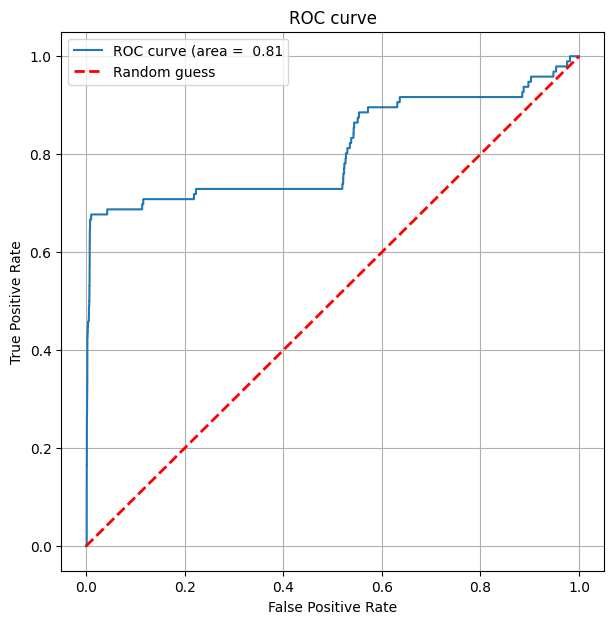

In [35]:
## ROC Curve
## import modules
from sklearn.metrics import auc, roc_curve

## all possible thresholds, tpr, fpr
fpr, tpr, thresh = roc_curve(y_test, p_hat)  ## need y_true and propensities

## Get AUC
AUC_val = auc(fpr, tpr)
print("AUC:", AUC_val)

## PLOT
import matplotlib.pyplot as plt
plt.figure(figsize = (7,7))
plt.plot(fpr, tpr, label= f'ROC curve (area = {AUC_val: 0.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

In [37]:
## The ROC Curve can be used to compared different models
## without needing to check on the threshold
## e.g. RF (AUC = 9)
## e.g.,LR (AUC = 0.81)
## regardless of the threshold chosen, RF would be better
## THEN, what is the best threshold?

In [38]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresh[optimal_idx]
print("Optimal Threshold:", optimal_threshold)

Optimal Threshold: 0.01349634374000582


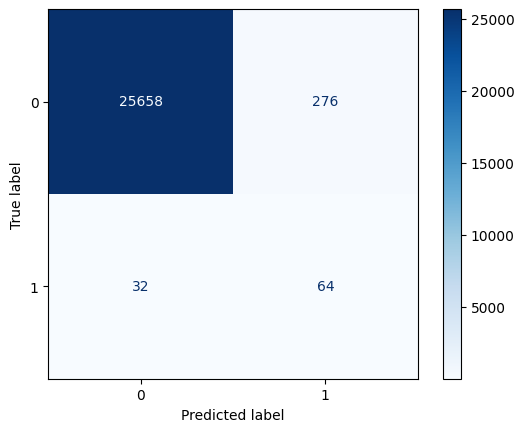

In [39]:
## LET'S USE IT
y_pred =(p_hat > optimal_threshold).astype(int)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap = "Blues")

In [40]:
## metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score
from imblearn.metrics import specificity_score

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Specificity: {specificity_score(y_test, y_pred)}')

print(f'===================================================')
print(f'True Positive Rate: {recall_score(y_test, y_pred)}')
print(f'False Positive Rate: {1 - specificity_score(y_test, y_pred)}')
print("True Positive Rate: HIGH")
print("False Positive Rate: LOW")

Accuracy: 0.9881674990395697
Recall: 0.6666666666666666
Precision: 0.18823529411764706
Specificity: 0.989357600061695
True Positive Rate: 0.6666666666666666
False Positive Rate: 0.010642399938304958
True Positive Rate: HIGH
False Positive Rate: LOW


## **LIFT**

In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/refs/heads/main/data/direct_mail_marketing.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [42]:
## open up acct: $300
## give this OFFER ONLY to those that are likely to open a CD
## how much better is my awesome model compared to flipping a coin  (LIFT)

In [43]:
## map to 1 for "yes"
## yes is the class of interest
df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})

In [44]:
## get dummies
df = pd.get_dummies(df, drop_first=True)

In [45]:
## create X and y
X = df.drop('deposit', axis=1)
y = df['deposit']

In [46]:
## split 80% and 30% seed = 591
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=591)

In [47]:
## LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

## instance
lr = LogisticRegression(solver = "liblinear")

## fit
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [48]:
## predictions
## 0.5
y_pred = lr.predict(X_test)

In [49]:
## propensities
p_hat = lr.predict_proba(X_test)[:,1]

In [51]:
df_test = X_test.copy()
df_test['y_true'] = y_test
df_test['p_hat'] = p_hat
df_test.sort_values('p_hat', ascending=False, inplace=True)
df_test.head(50)

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_true,p_hat
7198,30,1310,27,3284,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,True,0,1.000000
1351,47,238,13,3076,1,-1,0,True,False,False,...,True,False,False,False,False,False,False,True,1,1.000000
4364,53,849,6,3102,3,-1,0,False,False,False,...,False,False,False,False,False,False,False,True,1,1.000000
4134,44,423,12,2330,5,-1,0,False,False,False,...,True,False,False,False,False,False,False,True,1,0.999998
3221,38,775,12,1835,3,182,2,False,False,False,...,False,False,False,False,False,False,True,False,1,0.999983
4878,36,78,30,2692,9,-1,0,False,False,True,...,False,False,False,False,False,False,False,True,1,0.999975
4960,41,650,20,2420,3,-1,0,False,False,False,...,False,False,True,False,False,False,False,True,1,0.999973
4958,63,5112,13,2184,2,95,3,False,False,False,...,False,False,True,False,False,False,False,False,1,0.999967
888,30,1664,20,2016,1,-1,0,True,False,False,...,False,False,False,True,False,False,False,True,1,0.999958
5028,46,273,15,1962,1,105,3,False,False,False,...,False,False,False,False,True,False,False,False,1,0.999953


In [53]:
y_test

,deposit
1486,1
9511,0
3290,1
9072,0
2468,1
...,...
10909,0
7512,0
7270,0
9570,0


In [54]:
## overall proportion of 1s
y_test.value_counts() / len(y_test)

,count
deposit,
0,0.528516
1,0.471484


In [55]:
## CALCULATE THE LIFT FOR 10 OBS
## SEND THE OFFER TO TOP 10 PROBS
## HOW BETTER THAN RANDOM IS THE MODEL
overall_prop_1s = 0.471484
sample_prop_1s = 9/10

lift = sample_prop_1s / overall_prop_1s
lift

1.9088664726692741

In [56]:
## a graph with all lifts
!pip install kds
import kds

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,0.966,1.000,0.986,335.0,308.0,27.0,157.9,335,91.940,335.0,308.0,335,27.0,10.003,19.506,21.216,1.525,17.981,1.950
1,2,0.878,0.966,0.927,335.0,293.0,42.0,157.9,335,87.463,670.0,601.0,670,69.0,20.006,38.062,42.432,3.898,34.164,1.903
2,3,0.729,0.878,0.807,335.0,273.0,62.0,157.9,335,81.493,1005.0,874.0,1005,131.0,30.009,55.351,63.648,7.401,47.950,1.844
3,4,0.569,0.729,0.650,335.0,266.0,69.0,157.9,335,79.403,1340.0,1140.0,1340,200.0,40.012,72.198,84.864,11.299,60.899,1.804
4,5,0.405,0.568,0.484,335.0,205.0,130.0,157.9,239,61.194,1675.0,1345.0,1579,330.0,50.015,85.180,100.000,18.644,66.536,1.703
5,6,0.254,0.405,0.326,335.0,130.0,205.0,157.9,0,38.806,2010.0,1475.0,1579,535.0,60.018,93.414,100.000,30.226,63.188,1.556
6,7,0.161,0.254,0.202,335.0,70.0,265.0,157.9,0,20.896,2345.0,1545.0,1579,800.0,70.021,97.847,100.000,45.198,52.649,1.397
7,8,0.095,0.160,0.124,335.0,20.0,315.0,157.9,0,5.970,2680.0,1565.0,1579,1115.0,80.024,99.113,100.000,62.994,36.119,1.239
8,9,0.048,0.095,0.071,335.0,7.0,328.0,157.9,0,2.090,3015.0,1572.0,1579,1443.0,90.027,99.557,100.000,81.525,18.032,1.106
9,10,0.000,0.048,0.029,334.0,7.0,327.0,157.9,0,2.096,3349.0,1579.0,1579,1770.0,100.000,100.000,100.000,100.000,0.000,1.000


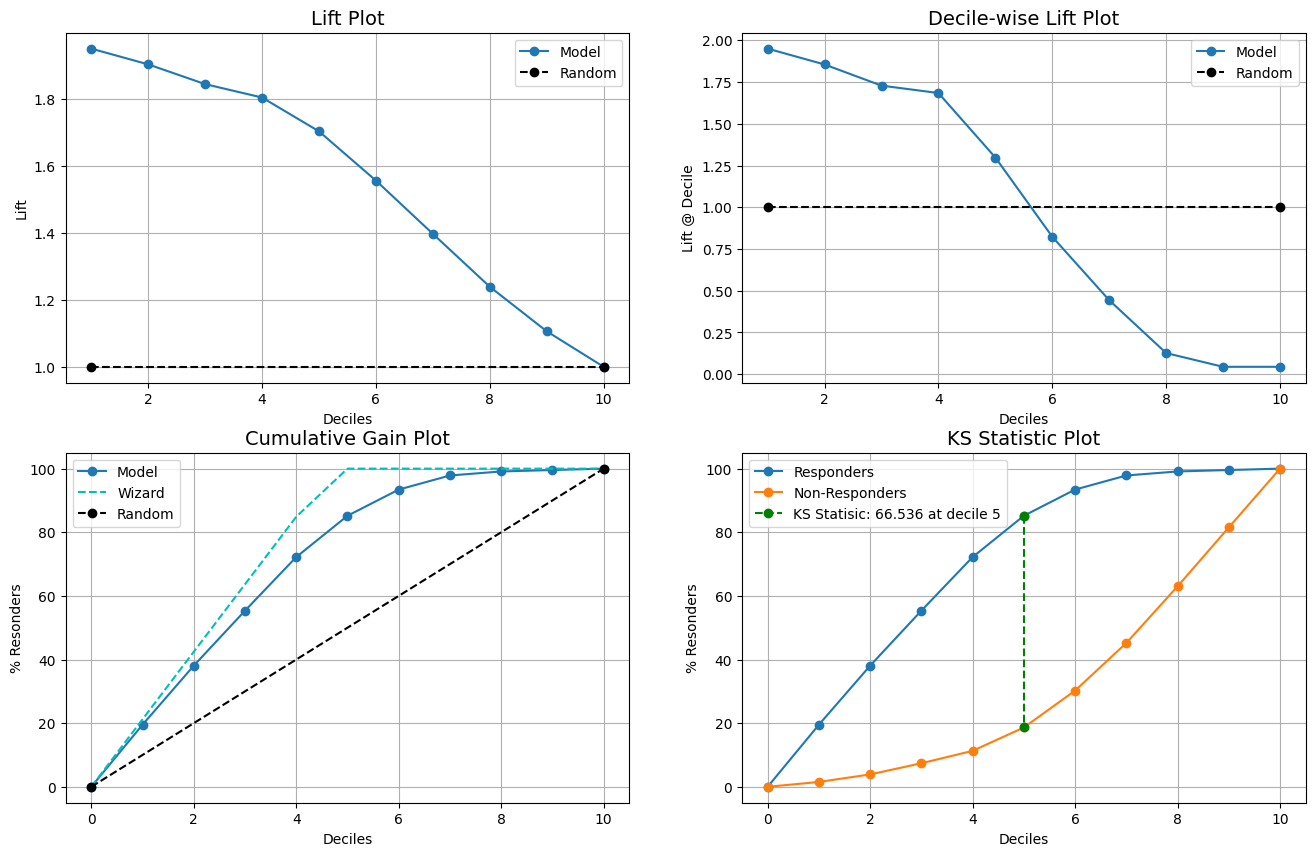

In [58]:
kds.metrics.report(y_test, p_hat)